In [1]:
# Importing Necessary Libraries

In [2]:
!pip install tensorflow

In [3]:
!pip install -U keras-tuner

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import keras_tuner as kt
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Loading the Dataset
#Forest Fires

In [6]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

Saving forestfires.csv to forestfires (4).csv


In [7]:
df = pd.read_csv('forestfires.csv')

In [8]:
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [9]:
#EDA

In [10]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [12]:
df.duplicated().sum()

8

In [13]:
# Removing Duplicate Values
df.drop_duplicates(inplace = True)

In [14]:
df.shape

(509, 31)

In [15]:
df.drop(columns= ['month', 'day'], inplace = True)

In [16]:
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [17]:
#Encoding the Target Column

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()

df['size_category'] = le.fit_transform(df['size_category'])
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
# Now small:1, Large = 0

In [21]:
#Standardizing the Data

In [22]:
sc = StandardScaler()

df.iloc[:,:-1] = sc.fit_transform(df.iloc[:,:-1])
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,-0.796040,-1.318386,-1.828931,-0.856568,-1.827729,0.412656,1.494370,-0.069035,-0.202791,2.265509,...,-0.202237,-0.062807,-0.25901,-0.180151,2.933219,-0.062807,-0.044368,-0.174254,-0.714413,1
1,-0.003257,-1.174053,0.489257,-0.507267,-0.148307,-0.688321,-1.729364,-0.069035,-0.202791,-0.441402,...,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,5.738757,-0.714413,1
2,-0.003257,-1.043839,0.561045,-0.507267,-0.730964,-0.688321,-1.507037,-0.069035,-0.202791,-0.441402,...,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,5.738757,-0.714413,1
3,0.194939,-1.206998,-1.896686,-0.005147,-1.810592,3.226265,-0.006333,0.606709,-0.202791,2.265509,...,-0.202237,-0.062807,-0.25901,-0.180151,2.933219,-0.062807,-0.044368,-0.174254,-0.714413,1
4,-0.237488,-0.924607,-1.797070,0.125841,-1.279346,3.348596,-1.229129,-0.069035,-0.202791,-0.441402,...,-0.202237,-0.062807,-0.25901,-0.180151,2.933219,-0.062807,-0.044368,-0.174254,-0.714413,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-1.624859,-0.839890,0.475141,-1.555170,1.531115,-0.749487,-0.728894,-0.069035,-0.102277,-0.441402,...,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,-0.174254,-0.714413,0
513,-1.624859,-0.839890,0.475141,-1.555170,0.520034,1.635965,0.994136,-0.069035,0.644559,-0.441402,...,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,-0.174254,-0.714413,0
514,-1.624859,-0.839890,0.475141,-1.555170,0.400076,1.574799,1.494370,-0.069035,-0.028608,-0.441402,...,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,-0.174254,-0.714413,0
515,0.681420,0.561083,0.269860,0.496973,1.154102,-0.137832,-0.006333,-0.069035,-0.202791,-0.441402,...,-0.202237,-0.062807,-0.25901,-0.180151,-0.340922,-0.062807,-0.044368,-0.174254,-0.714413,1


In [23]:
# Model Building
#Spliting the Data into Train and Test

In [24]:
x = df.iloc[:,:-1]
y = df['size_category']

In [25]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = 0.2, random_state= 42)

In [26]:
# Initialize the Data
ann = Sequential()

#Add Hidden Layers
ann.add(Dense(units= 10, activation= 'relu'))

#Add Output Layer
ann.add(Dense(units= 1, activation= 'sigmoid'))

# Establish the connection between the Layers
ann.compile(optimizer= 'adadelta', loss= 'binary_crossentropy', metrics= 'accuracy')

# Fit the Data
ann.fit(xtrain,ytrain, epochs= 100)

Epoch 1/100
13/13 [==============================] - 2s 3ms/step - loss: 0.6703 - accuracy: 0.6953
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6703 - accuracy: 0.6953
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6703 - accuracy: 0.6953
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6703 - accuracy: 0.6953
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6703 - accuracy: 0.6953
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6703 - accuracy: 0.6953
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6702 - accuracy: 0.6953
Epoch 8/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6702 - accuracy: 0.6953
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.6702 - accuracy: 0.6953
Epoch 10/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6702 - accuracy: 0.6953
Epoch 11/

In [27]:
ypred = ann.predict(xtest)
ypred

4/4 [==============================] - 0s 2ms/step


array([[0.6955291 ],
       [0.8356869 ],
       [0.610296  ],
       [0.84058934],
       [0.67884463],
       [0.6856358 ],
       [0.47162834],
       [0.78409797],
       [0.8746031 ],
       [0.49615085],
       [0.86984956],
       [0.8300522 ],
       [0.87039137],
       [0.63825244],
       [0.75065845],
       [0.8207409 ],
       [0.49688342],
       [0.8160651 ],
       [0.8763342 ],
       [0.5160355 ],
       [0.9006709 ],
       [0.46832442],
       [0.8592922 ],
       [0.79424214],
       [0.62905884],
       [0.5663787 ],
       [0.6724895 ],
       [0.5866194 ],
       [0.23011914],
       [0.59591854],
       [0.7469529 ],
       [0.910737  ],
       [0.53493685],
       [0.34076446],
       [0.7903601 ],
       [0.82910734],
       [0.9012607 ],
       [0.54387456],
       [0.7734537 ],
       [0.60936046],
       [0.75462216],
       [0.75362283],
       [0.75409484],
       [0.7921576 ],
       [0.7813308 ],
       [0.52565616],
       [0.89911896],
       [0.716

In [28]:
ypred = ypred >0.5
ypred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [

In [29]:
ann.evaluate(xtrain,ytrain)

13/13 [==============================] - 0s 2ms/step - loss: 0.6687 - accuracy: 0.6953


[0.6687436699867249, 0.6953316926956177]

In [30]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.28      0.17      0.21        29
           1       0.71      0.82      0.76        73

    accuracy                           0.64       102
   macro avg       0.50      0.50      0.49       102
weighted avg       0.59      0.64      0.61       102



In [31]:
# The Model Performance is really not well, We need to perform HyperParameter Tuning
#Hyperparamter Tuning

In [32]:
def hyper(hp):
    model = Sequential()
    counter = 0
    for i in range(hp.Int('num_layers', min_value = 1, max_value = 10)):
        if counter == 0:
            model.add(Dense(hp.Int('units' + str(i), min_value = 1, max_value = 120, step = 10),
                                  activation = hp.Choice('activation' + str(i), values = ['relu', 'tanh', 'sigmoid']),
                                  input_dim = 28))

    else:
        model.add(Dense(hp.Int('units' + str(i),min_value = 1, max_value = 120, step = 10),
                                  activation = hp.Choice('activation' + str(i), values = ['relu', 'tanh', 'sigmoid'])))
    counter+=1
    model.add(Dense(units = 1, activation= 'sigmoid'))
    model.compile(optimizer = hp.Choice('optimizer', values = ['adam','rmsprop','sgd']),
                 loss = 'binary_crossentropy', metrics = 'accuracy')
    return model

In [33]:
tuner = kt.RandomSearch(hyper,
                        objective = 'val_accuracy',
                        max_trials= 3)

Reloading Tuner from ./untitled_project/tuner0.json


In [34]:
tuner.search(xtrain,ytrain, epochs = 3, validation_data = (xtest,ytest))

In [35]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 2,
 'units0': 92,
 'activation0': 'tanh',
 'optimizer': 'sgd',
 'units1': 67,
 'activation1': 'sigmoid',
 'units2': 57,
 'activation2': 'tanh',
 'units3': 72,
 'activation3': 'relu',
 'units4': 32,
 'activation4': 'relu',
 'units5': 32,
 'activation5': 'relu',
 'units6': 67,
 'activation6': 'sigmoid',
 'units7': 52,
 'activation7': 'relu',
 'units8': 7,
 'activation8': 'relu',
 'units9': 7,
 'activation9': 'tanh',
 'units10': 97,
 'activation10': 'sigmoid',
 'units11': 72,
 'activation11': 'sigmoid',
 'units12': 22,
 'activation12': 'relu',
 'units13': 2,
 'activation13': 'sigmoid',
 'units14': 92,
 'activation14': 'tanh',
 'units15': 17,
 'activation15': 'sigmoid',
 'units16': 67,
 'activation16': 'sigmoid'}

In [36]:
x.shape

(509, 28)

In [37]:
tuned_model = tuner.get_best_models(num_models=1)[0]
tuned_model.build(x.shape)

In [38]:
tuned_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 92)                2668      
                                                                 
 dense_1 (Dense)             (None, 67)                6231      
                                                                 
 dense_2 (Dense)             (None, 67)                4556      
                                                                 
 dense_3 (Dense)             (None, 1)                 68        
                                                                 
Total params: 13523 (52.82 KB)
Trainable params: 13523 (52.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
tuned_model.fit(xtrain,ytrain, epochs = 100, validation_data = (xtest,ytest))

Epoch 1/100
13/13 [==============================] - 1s 32ms/step - loss: 0.5936 - accuracy: 0.7322 - val_loss: 0.5986 - val_accuracy: 0.7157
Epoch 2/100
13/13 [==============================] - 0s 8ms/step - loss: 0.5843 - accuracy: 0.7322 - val_loss: 0.5962 - val_accuracy: 0.7157
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 0.5818 - accuracy: 0.7322 - val_loss: 0.5958 - val_accuracy: 0.7157
Epoch 4/100
13/13 [==============================] - 0s 12ms/step - loss: 0.5807 - accuracy: 0.7322 - val_loss: 0.5960 - val_accuracy: 0.7157
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.5803 - accuracy: 0.7322 - val_loss: 0.5961 - val_accuracy: 0.7157
Epoch 6/100
13/13 [==============================] - 0s 8ms/step - loss: 0.5803 - accuracy: 0.7322 - val_loss: 0.5961 - val_accuracy: 0.7157
Epoch 7/100
13/13 [==============================] - 0s 7ms/step - loss: 0.5802 - accuracy: 0.7322 - val_loss: 0.5965 - val_accuracy: 0.7157
Epoch 8/100

In [40]:
tuned_model.evaluate(xtrain,ytrain)

13/13 [==============================] - 0s 2ms/step - loss: 0.5764 - accuracy: 0.7322


[0.5764302611351013, 0.7321867346763611]

In [41]:
tuned_model.evaluate(xtest,ytest)

4/4 [==============================] - 0s 3ms/step - loss: 0.5930 - accuracy: 0.7157


[0.5930135250091553, 0.7156862616539001]

In [42]:
#we have created a generalized model

In [43]:
#Loading Dataset
#gas_turbines

In [44]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

Saving gas_turbines.csv to gas_turbines (3).csv


In [45]:
df = pd.read_csv('gas_turbines.csv')
df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [46]:
#EDA

In [47]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


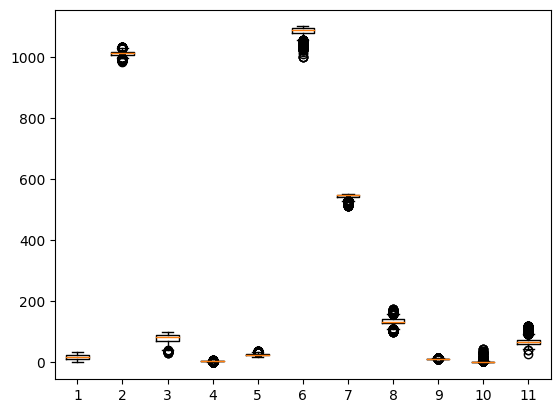

In [49]:
plt.boxplot(df)
plt.show()

In [50]:
df.duplicated().sum()

0

In [51]:
#Our gas_turbine Dataset is free of errors

In [52]:
#Lets Standardize our Dataset and also split them into Train and Test

In [53]:
x = df.drop(columns = ['TEY'])
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [54]:
x = sc.fit_transform(x)
x

array([[-1.4397781 , -0.82664395,  1.28143632, ..., -1.35733078,
         0.53201195,  1.3878449 ],
       [-1.44960109, -0.74864748,  1.30456402, ..., -1.36367619,
         0.56873344,  1.39300237],
       [-1.43472138, -0.68625031,  1.21908576, ..., -1.36095673,
         0.5529378 ,  1.36358566],
       ...,
       [-1.38626659, -1.07623263,  1.47697056, ..., -1.46792219,
         2.69592467,  2.17006209],
       [-1.42042259, -0.99823616,  1.44159024, ..., -1.42259784,
         1.9246834 ,  2.391165  ],
       [-1.43073409, -0.93583899,  1.33465179, ..., -1.37727349,
         1.35415028,  2.32153907]])

In [55]:
y = df['TEY']
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

In [56]:
#Model Building

In [57]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = 0.2, random_state= 42)

In [58]:
# Initialize the Data
ann = Sequential()

#Add Hidden Layers
ann.add(Dense(units= 10, activation= 'relu'))
ann.add(Dense(units= 20, activation= 'relu'))
ann.add(Dense(units= 30, activation= 'relu'))

#Add Output Layer
ann.add(Dense(units= 1))

# Establish the connection between the Layers
ann.compile(optimizer= 'adam', loss= 'mse')

# Fit the Data
ann.fit(xtrain,ytrain, epochs= 100, validation_data = (xtest,ytest))
loss = ann.history.history

Epoch 1/100
376/376 [==============================] - 3s 4ms/step - loss: 7488.5112 - val_loss: 627.5613
Epoch 2/100
376/376 [==============================] - 1s 2ms/step - loss: 366.6349 - val_loss: 231.2795
Epoch 3/100
376/376 [==============================] - 1s 2ms/step - loss: 177.7224 - val_loss: 136.5120
Epoch 4/100
376/376 [==============================] - 1s 2ms/step - loss: 109.7318 - val_loss: 90.4808
Epoch 5/100
376/376 [==============================] - 1s 2ms/step - loss: 73.8918 - val_loss: 63.4186
Epoch 6/100
376/376 [==============================] - 1s 2ms/step - loss: 52.5390 - val_loss: 47.1209
Epoch 7/100
376/376 [==============================] - 1s 2ms/step - loss: 39.2508 - val_loss: 36.0920
Epoch 8/100
376/376 [==============================] - 1s 2ms/step - loss: 30.2053 - val_loss: 27.1666
Epoch 9/100
376/376 [==============================] - 1s 2ms/step - loss: 22.7688 - val_loss: 21.0220
Epoch 10/100
376/376 [==============================] - 1s 2ms/st

In [59]:
ypred = ann.predict(xtest)
ypred

94/94 [==============================] - 0s 1ms/step


array([[134.72371],
       [112.22561],
       [134.44743],
       ...,
       [146.52547],
       [149.70374],
       [111.71568]], dtype=float32)

In [60]:
ls = pd.DataFrame(loss)
ls

,loss,val_loss
0,7488.511230,627.561340
1,366.634888,231.279510
2,177.722366,136.511993
3,109.731819,90.480843
4,73.891792,63.418606
...,...,...
95,0.448384,0.480267
96,0.425057,0.332285
97,0.427219,0.394747
98,0.431717,0.402409


<Axes: >

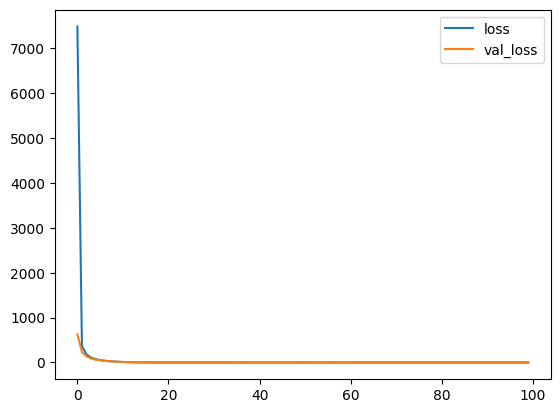

In [61]:
ls.plot()

In [62]:
from sklearn.metrics import r2_score

In [63]:
r2_score(ytest,ypred)

0.9986822429287623

In [64]:
# The Model is Performing Really Well